# Illustration of Convolutional Neural Networks using MNIST Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.2.0


## Download and prepare MNIST Dataset


In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print('Number of axes in train images: ', train_images.ndim)
print('Number of axes in test images: ', test_images.ndim)
print('Shape of train images: ', train_images.shape)
print('Shape of test images: ', test_images.shape)


Number of axes in train images:  3
Number of axes in test images:  3
Shape of train images:  (60000, 28, 28)
Shape of test images:  (10000, 28, 28)


## Reshape the data
- MNSIT dataset consists of gray scale images
- Gray-scale images have depth 1 (unlike RGB, where depth is 3)
- Each image is of 28X28.
- We reshape each image into a 3D tensor so that the input becomes a 4D tensor (first dimension being total number of images in the dataset - that is 60000 for training set)
- This is done to satisfy the input requirements of the CNNs

In [ ]:
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))

In [ ]:
print("After reshaping:")
print('Number of axes in train images: ', train_images.ndim)
print('Number of axes in test images: ', test_images.ndim)
print('Shape of train images: ', train_images.shape)
print('Shape of test images: ', test_images.shape)

After reshaping:
Number of axes in train images:  4
Number of axes in test images:  4
Shape of train images:  (60000, 28, 28, 1)
Shape of test images:  (10000, 28, 28, 1)


## Normalization of data

In [ ]:
# normalize pixels to be between 0 and 1
train_images, test_images= train_images/255.0, test_images/255.0

### Create the convolutional base

In [ ]:
model=keras.models.Sequential()

The 6 lines of code below define the convolutional base using common pattern: 
- a stack of Conv2D and MaxPooling2D layers. 
- As an input, CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. 
- In this example, we will configure our CNN to process inputs of shape (28,28,1), which is the format of MNSIT images. 
- We do this by passing the argument input_shape to our first layer.

In [ ]:
# First layer has 32 filters, each filter has (3,3) size. And stride is 1. We are not using  padding any convolution layer.
model.add(keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))

- In the above CNN layer, 32 filters are there, each of size 3x3.
- The number of filters is similar to number of neurons, since each neuron performs a different convolution on the input to the layer (more precisely, the neurons' input weights form convolution kernels).
- A feature map is the result of applying a filter (thus, you have as many feature maps as filters), and its size is a result of window/kernel size of your filter and stride.
- Stride is taken as 1
- **When we apply 3x3 filter with stride 1 on 28x28 image, the shape of the image will become (26,26,1)**

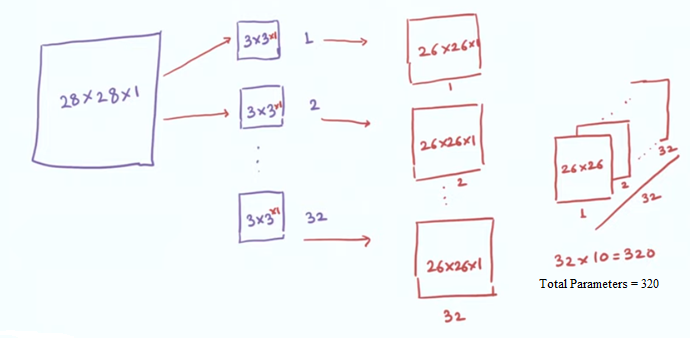

**NOTE** 
- If 2 different convolutional filters are applied to the input image, it results in 2 different feature maps (the output of the filters). 
- Each pixel of each feature map is an output of the convolutional layer.
- For instance, if you have 28x28 input images and a convolutional layer with 20 7x7 filters and stride 1, you will get 20 22x22 feature maps at the output of this layer. 
- Note that this is presented to the next layer as a volume with width = height = 22 and depth = num_channels = 20.

#### Adding Pooling Layer
- Pooling is used to down-sample the output of convolution aggressively. 
- It is conceptually similar to strided convolution. 
- It consists of extracting a specific window from input feature and compute the output based on pooling policy (Either **max pooling** or **average pooling**)
- Pooling is usually done with the window of size 2*2 with a stride of 2. 
- It is not necessary that every convlution layer should be followed by a pooling layer.
- Sometimes, we can have pooling after a few convolution layers as well. 
- **Pooling is also used for avoiding over-fitting in the model**


In [ ]:
model.add(keras.layers.MaxPooling2D((2,2)))

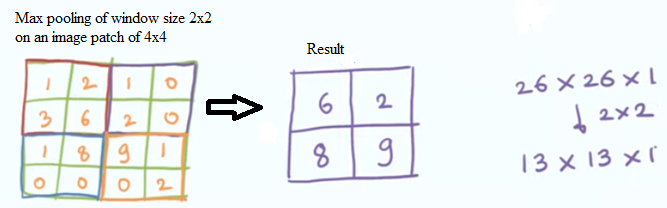

In [ ]:
# second layer has 64 filters
model.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

In [ ]:
# third layer has 64 filters
model.add(keras.layers.Conv2D(64,(3,3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


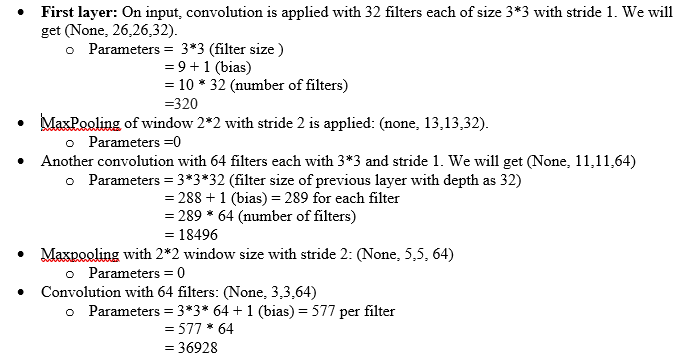

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of output channels for each Conv2D is controlled by the first argument (ex. 32 or 64). Typically, as width and height shrink, we can afford (computationally) to add more output channels in each Conv2D layer

## Add Dense layers on top
To complete our model, we will feed the last output tensor from the convolutional base (of shape (3,3,64)) into one or more dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. So, first we will flatten (or unroll) the 3D output into 1D, then add one or more Dense layers on top. MNIST has 10 output classes, we we use final Dense layer with 10 outputs and a softmax activation. 

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Here is our complete architecture of our model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

As you see, our (3,3,64) outputs were flattened into vectors of shape (576) before going through two dense layers

## Compile and train the model

In [ ]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels,  validation_split = 0.2,epochs=2)

Epoch 1/2
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 0.0428 - val_accuracy: 0.9902
Epoch 2/2
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0397 - val_accuracy: 0.9901


## Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9914
0.9914000034332275


As you see, our simple CNN has achieved a test accuracy of around 99%

## Classification with Feedforward Neural Networks
It is important to compare CNN with fully connected feedforward neural network that we used in earleir examples.

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
model_dnn = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape=(28,28)),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
model_dnn.compile(optimizer ='adam', 
                 loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model_dnn.summary()

In [ ]:
model_dnn.fit(train_images, train_labels,epochs=5)

In [ ]:
test_loss, test_acc = model_dnn.evaluate(test_images,test_labels)
print(test_acc)